In [13]:
import numpy as np
import os as os
import matplotlib.pyplot as plt
import torch

In [14]:
path = '../../../../../DataSet/S2MTCP/data_S21C/'

In [15]:
def image_normalize_quantile(image, first=0.01, last=0.99):
    q = torch.tensor([first, last]).float()
    (C,M,N) = image.shape
    for i in range(C):
        qtnl = torch.quantile(image[i,:,:].view(-1), q, dim=0)
        min = qtnl[0]
        max = qtnl[1]
        image[i,:,:] = (image[i,:,:] - min )/( max - min )
        res = image[i,:,:].clone()
        res[image[i,:,:] < 0] = 0.0
        res[image[i,:,:] > 1] = 1.0
        image[i,:,:] = res
    return image

def get_s2mtcp_image(img_path):
    image = torch.from_numpy(np.load(img_path)).float()
    image = torch.einsum('ijk->kij',image)
    # image = (image - image.min())/(image.max() - image.min())
    image = image_normalize_quantile(image)
    return image

In [16]:
def get_rgb_ndarray(image):

    data = image.numpy()
    
    r = data[4,:,:]
    g = data[3,:,:]
    b = data[2,:,:]

    rgb = np.stack([r,g,b])
    rgb = np.einsum('ijk->jki',rgb)

    return rgb

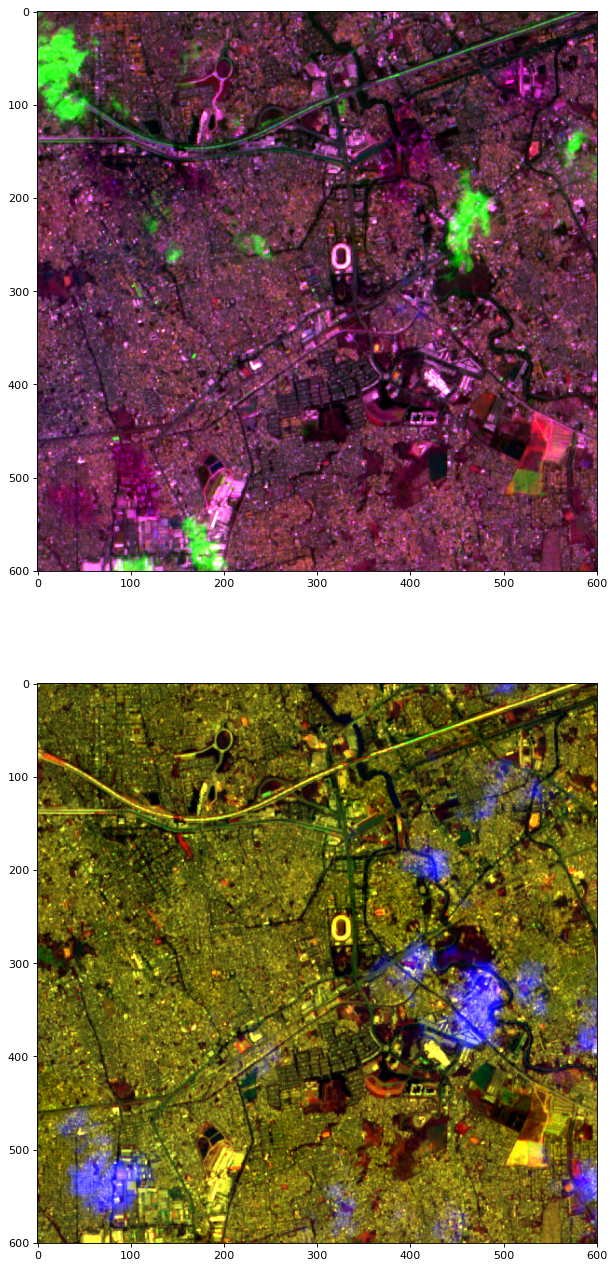

In [22]:
f, axarr = plt.subplots(nrows=2, ncols=1,figsize=(20, 20),dpi=80)
I1 = get_s2mtcp_image(os.path.join(path, '69_a.npy'))
axarr[0].imshow(get_rgb_ndarray(I1))
I2 = get_s2mtcp_image(os.path.join(path, '69_b.npy'))
axarr[1].imshow(get_rgb_ndarray(I2))

In [13]:
# import csv

# path = '../../../../DataSet/S2MTCP/'
# file_name = 'S2MTCP_metadata.csv'
# file_path = os.path.join(path, file_name)

# with open(file_path, 'r') as file:
#   csvreader = csv.reader(file)
#   header = next(csvreader)
#   list = [row[3] for row in csvreader]
#   print("==>> list: ", list)
  